# Download Packages

In [ ]:
!pip install idx2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7919 sha256=b39b1dedeb48ad851f76a108fc573e3b725b0da7226b82d2594bf7cd4bfa7443
  Stored in directory: /root/.cache/pip/wheels/27/40/a8/6447ee4a00cb87e2084e1ef1df5c38433720cc1090be082842
Successfully built idx2numpy


In [ ]:
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz
!gunzip /content/train-images-idx3-ubyte.gz
!gunzip /content/train-labels-idx1-ubyte.gz
!gunzip /content/t10k-images-idx3-ubyte.gz
!gunzip /content/t10k-labels-idx1-ubyte.gz

--2023-01-24 08:48:35--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.169.52
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.169.52|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M  8.42MB/s    in 3.0s    

2023-01-24 08:48:39 (8.42 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2023-01-24 08:48:39--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.169.52
Connecting to fashion-mnist.s3-website.eu-central-1.amaz

# Import packages

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy

# Load the images

In [ ]:
train_images = idx2numpy.convert_from_file('/content/train-images-idx3-ubyte')
train_labels = idx2numpy.convert_from_file('/content/train-labels-idx1-ubyte')
test_images = idx2numpy.convert_from_file('/content/t10k-images-idx3-ubyte')
test_labels = idx2numpy.convert_from_file('/content/t10k-labels-idx1-ubyte')

labels_name = ['t_shirt_top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

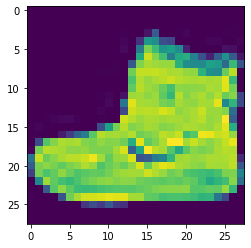

Label: ankle_boots


In [ ]:
plt.imshow(train_images[0])
plt.show()
print("Label:", labels_name[train_labels[0]])

## Question:
1. Write a function that prints stats of the loaded data. (number of images, number of distint classes, dimension of each image and number of images in each class)

2. Write a function that will randomly select 4 images from the training set and display them along their classes.

In [ ]:
# Write the answer here

def print_data_stats(train_images,train_labels,test_images,test_labels):
  print("Traing data stats:\n")
  n_train_images = train_images.shape[0]
  n_classes = len(np.unique(train_labels))
  image_dim = train_images.shape[1:] #train_images[0].shape
  number_images_every_class = np.unique(train_labels,return_counts=True)[1]

  print("Test data stats:\n")
  
  pass

In [ ]:
def show_random_4(train_images,train_labels):
   # You can refer here for multiple plots
   # https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/#:~:text=The%20easiest%20way%20to%20display,by%20calling%20add_subplot()%20method.
  pass

In [ ]:
np.unique(train_labels,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

# Pytorch Dataset and Dataloaders

## Datasets

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
# Taken form https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

# NOT TO RUN, JUST FOR UNDERSTANDING
# Lets go through the following code step by step
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        return image, label

### Question
1. Write a custom Dataset class for fashion MNIST. \\
  Hints:
      - What are the things I need to intialise my dataset? (The __init__ args)
      - Make use of idx2numpy library
      - In our data the images are already loaded into arrays


In [ ]:
# Write the custom Dataset class here
class FasionMNISTImageDataset(Dataset):
    def __init__(self, image_path,label_path): # image_path = '/content/train-images-idx3-ubyte' label_path='/content/train-labels-idx1-ubyte'

      self.images = idx2numpy.convert_from_file(image_path)
      self.labels = idx2numpy.convert_from_file(label_path)

    def __len__(self):
      return self.images.shape[0]

    def __getitem__(self, idx):
      
      image_array = self.images[idx]
      label = self.labels[idx]

      return image_array,label

In [ ]:
training_data = FasionMNISTImageDataset('/content/train-images-idx3-ubyte','/content/train-labels-idx1-ubyte')
testing_data = FasionMNISTImageDataset('/content/t10k-images-idx3-ubyte','/content/t10k-labels-idx1-ubyte')

In [ ]:
training_data

## Dataloaders

Processing 1 sample at a time is gonna take forever. So, we will use batching.

In [ ]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=64, shuffle=True)

In [ ]:
for images,labels in train_dataloader:
  print(images.size())
  print(labels.size())
  break

torch.Size([64, 28, 28])
torch.Size([64])


/usr/local/lib/python3.8/dist-packages/torch/utils/data/_utils/collate.py:172: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:199.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)


### Question

1. Write code that will iterate through the `train_dataloader` and increment `ankle_counter` by the number of ankle images in the batch. You may use parts of the code which you wrote for data stats.
2. Write code that will iterate throught the `test_dataloader` and show the last image in the 5th batch with a black square(a=5) in the middle.
3. Find the mean and variance of the average pixel value of all batches.

In [ ]:
# Write you code here
# Label of ankle_boots is 9
ankle_counter = 0
for images,labels in train_dataloader:
  # print(labels == 9)
  # print(torch.sum(labels == 9).item())
  ankle_counter+=torch.sum(labels == 9).item()


print(ankle_counter)

6000


In [ ]:
# Write you code here

In [ ]:
# Write you code here
